In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv('PaloAltoev.csv')

In [ ]:
data.head()

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,7/29/2011 23:20,3:03:32,1:54:03,...,-122.160309,USD,0,Plug Out at Vehicle,3,95124.0,3284.0,NaN,NaN,NaN
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,7/30/2011 0:02,0:02:06,0:01:54,...,-122.160309,USD,0,Customer,4,94301.0,4169.0,NaN,NaN,NaN
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,7/30/2011 12:34,4:17:32,4:17:28,...,-122.160309,USD,0,Plug Out at Vehicle,5,94301.0,4169.0,NaN,NaN,NaN
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,7/30/2011 16:55,2:03:24,2:02:58,...,-122.160309,USD,0,Customer,6,94302.0,2545.0,NaN,NaN,NaN
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,7/30/2011 20:03,1:11:24,0:43:54,...,-122.160309,USD,0,Plug Out at Vehicle,7,94043.0,3765.0,NaN,NaN,NaN


In [ ]:
data.columns

Index(['Station Name', 'MAC Address', 'Org Name', 'Start Date',
       'Start Time Zone', 'End Date', 'End Time Zone',
       'Transaction Date (Pacific Time)', 'Total Duration (hh:mm:ss)',
       'Charging Time (hh:mm:ss)', 'Energy (kWh)', 'GHG Savings (kg)',
       'Gasoline Savings (gallons)', 'Port Type', 'Port Number', 'Plug Type',
       'EVSE ID', 'Address 1', 'City', 'State/Province', 'Postal Code',
       'Country', 'Latitude', 'Longitude', 'Currency', 'Fee', 'Ended By',
       'Plug In Event Id', 'Driver Postal Code', 'User ID', 'County',
       'System S/N', 'Model Number'],
      dtype='object')

In [ ]:
data.columns=data.columns.str.replace(' ','_')

In [ ]:
data.isna().sum()

Station_Name                          0
MAC_Address                           0
Org_Name                              0
Start_Date                            0
Start_Time_Zone                       0
End_Date                              0
End_Time_Zone                         0
Transaction_Date_(Pacific_Time)       0
Total_Duration_(hh:mm:ss)             0
Charging_Time_(hh:mm:ss)              0
Energy_(kWh)                          0
GHG_Savings_(kg)                      0
Gasoline_Savings_(gallons)            0
Port_Type                             0
Port_Number                           0
Plug_Type                             0
EVSE_ID                            9999
Address_1                             0
City                                  0
State/Province                        0
Postal_Code                           0
Country                               0
Latitude                              0
Longitude                             0
Currency                           1500


In [ ]:
data.shape

(9999, 33)

In [ ]:
list_null_cols= []
for i in data.columns:
    if data[i].isna().sum() == data.shape[0]:
        list_null_cols.append(i)

In [ ]:
list_null_cols

['EVSE_ID', 'County', 'System_S/N', 'Model_Number']

In [ ]:
list_single_cols = []
for i in data.columns:
    if data[i].nunique() == 1:
        list_single_cols.append(i)

In [ ]:
list_single_cols

['Org_Name',
 'City',
 'State/Province',
 'Postal_Code',
 'Country',
 'Currency',
 'Fee']

In [ ]:
data.drop(list_single_cols+list_null_cols,axis=1,inplace=True)

In [ ]:
data.columns

Index(['Station_Name', 'MAC_Address', 'Start_Date', 'Start_Time_Zone',
       'End_Date', 'End_Time_Zone', 'Transaction_Date_(Pacific_Time)',
       'Total_Duration_(hh:mm:ss)', 'Charging_Time_(hh:mm:ss)', 'Energy_(kWh)',
       'GHG_Savings_(kg)', 'Gasoline_Savings_(gallons)', 'Port_Type',
       'Port_Number', 'Plug_Type', 'Address_1', 'Latitude', 'Longitude',
       'Ended_By', 'Plug_In_Event_Id', 'Driver_Postal_Code', 'User_ID'],
      dtype='object')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Feature engineering
data['Transaction_Date'] = pd.to_datetime(data['Transaction_Date_(Pacific_Time)'])
data['transaction_time'] = data['Transaction_Date'].apply(lambda x: x.timestamp())
data['hour'] = data['Transaction_Date'].dt.hour
data['dayofweek'] = data['Transaction_Date'].dt.dayofweek
data['month'] = data['Transaction_Date'].dt.month
data['season'] = (data['Transaction_Date'].dt.month % 12 + 3)//3
data['is_weekend'] = np.where(data['dayofweek'] >= 5, 1, 0)

In [ ]:
# Data preprocessing
data = data.drop(columns=[ 'MAC_Address', 'Start_Date', 'Start_Time_Zone', 
                          'End_Date', 'End_Time_Zone', 'Transaction_Date_(Pacific_Time)', 
                          'GHG_Savings_(kg)', 'Gasoline_Savings_(gallons)', 'Port_Type', 
                          'Plug_Type' , 'Address_1', 
                          'Ended_By', 'Plug_In_Event_Id', 'Driver_Postal_Code'])
data['Total_Duration_(hh:mm:ss)'] = pd.to_timedelta(data['Total_Duration_(hh:mm:ss)']).dt.total_seconds()
data['Charging_Time_(hh:mm:ss)'] = pd.to_timedelta(data['Charging_Time_(hh:mm:ss)']).dt.total_seconds()
data['Energy_(kWh)'] = pd.to_numeric(data['Energy_(kWh)'])

In [ ]:
data.columns

Index(['Station_Name', 'Total_Duration_(hh:mm:ss)', 'Charging_Time_(hh:mm:ss)',
       'Energy_(kWh)', 'Port_Number', 'Latitude', 'Longitude', 'User_ID',
       'Transaction_Date', 'transaction_time', 'hour', 'dayofweek', 'month',
       'season', 'is_weekend'],
      dtype='object')

In [ ]:
data1=data[data['User_ID'].notnull()].copy(deep=True)

In [ ]:
# Data split
X = data.drop(columns=['Charging_Time_(hh:mm:ss)','Transaction_Date','Total_Duration_(hh:mm:ss)', 'User_ID'])
y = data['Charging_Time_(hh:mm:ss)']
X.columns

Index(['Station_Name', 'Energy_(kWh)', 'Port_Number', 'Latitude', 'Longitude',
       'transaction_time', 'hour', 'dayofweek', 'month', 'season',
       'is_weekend'],
      dtype='object')

In [ ]:
# Define the train-test split ratio
train_ratio = 0.8
train_size = int(len(X) * train_ratio)

# Split the data into training and testing sets
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


# Import the OneHotEncoder class
from sklearn.preprocessing import OneHotEncoder

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

# Fit the encoder on the 'Plug_Type' column
encoder.fit(X_train[['Station_Name']])

# Transform the 'Plug_Type' column using the encoder
X_train_encoded = pd.DataFrame(encoder.transform(X_train[['Station_Name']]).toarray(), columns=encoder.get_feature_names_out(['Station_Name']))
X_train_encoded.index = X_train.index

# Concatenate the encoded 'Plug_Type' column with the rest of the X_train data
X_train = pd.concat([X_train.drop(columns=['Station_Name']), X_train_encoded], axis=1)

# Repeat the same process for X_test
X_test_encoded = pd.DataFrame(encoder.transform(X_test[['Station_Name']]).toarray(), columns=encoder.get_feature_names_out(['Station_Name']))
X_test_encoded.index = X_test.index
X_test = pd.concat([X_test.drop(columns=['Station_Name']), X_test_encoded], axis=1)


In [ ]:
# # Model selection and training
# models = {'Random Forest Regression': RandomForestRegressor(random_state=42)}
# for name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     print(f"{name} - MAE: {mean_absolute_error(y_test, y_pred)}, MSE: {mean_squared_error(y_test, y_pred)}, R2: {r2_score(y_test, y_pred)}")

# y_pred = model.predict(X_test)

In [ ]:
model=RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R2: {r2}")

MAE: 1496.3994950000001, MSE: 6934946.35090695, RMSE: 2633.428630304408, R2: 0.7384063301875837


In [ ]:
y_train_pred= model.predict(X_train)

In [ ]:
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_train_pred)

print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R2: {r2}")


MAE: 344.52469308663586, MSE: 385770.9425873984, RMSE: 621.1046148495424, R2: 0.9842471081434068


In [ ]:
# Data split
X = data1.drop(columns=['Charging_Time_(hh:mm:ss)','Transaction_Date','Total_Duration_(hh:mm:ss)'])
y = data1['Charging_Time_(hh:mm:ss)']
X.columns

Index(['Station_Name', 'Energy_(kWh)', 'Port_Number', 'Latitude', 'Longitude',
       'User_ID', 'transaction_time', 'hour', 'dayofweek', 'month', 'season',
       'is_weekend'],
      dtype='object')

In [ ]:
X.head()

,Station_Name,Energy_(kWh),Port_Number,Latitude,Longitude,User_ID,transaction_time,hour,dayofweek,month,season,is_weekend
0,PALO ALTO CA / HAMILTON #1,6.249457,2,37.444572,-122.160309,3284.0,1.311982e+09,23,4,7,3,0
1,PALO ALTO CA / HAMILTON #1,0.106588,2,37.444572,-122.160309,4169.0,1.311984e+09,0,5,7,3,1
2,PALO ALTO CA / HAMILTON #1,14.951777,2,37.444572,-122.160309,4169.0,1.312029e+09,12,5,7,3,1
3,PALO ALTO CA / HAMILTON #1,7.159643,2,37.444572,-122.160309,2545.0,1.312045e+09,16,5,7,3,1
4,PALO ALTO CA / HAMILTON #1,1.957765,2,37.444572,-122.160309,3765.0,1.312056e+09,20,5,7,3,1


In [ ]:
#USER level transaction duration prediction

In [ ]:
# Define the train-test split ratio
train_ratio = 0.8
train_size = int(len(X) * train_ratio)

# Split the data into training and testing sets
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


# Import the OneHotEncoder class
from sklearn.preprocessing import OneHotEncoder

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

# Fit the encoder on the 'Plug_Type' column
encoder.fit(X_train[['Station_Name']])

# Transform the 'Plug_Type' column using the encoder
X_train_encoded = pd.DataFrame(encoder.transform(X_train[['Station_Name']]).toarray(), columns=encoder.get_feature_names_out(['Station_Name']))
X_train_encoded.index = X_train.index

# Concatenate the encoded 'Plug_Type' column with the rest of the X_train data
X_train = pd.concat([X_train.drop(columns=['Station_Name']), X_train_encoded], axis=1)

# Repeat the same process for X_test
X_test_encoded = pd.DataFrame(encoder.transform(X_test[['Station_Name']]).toarray(), columns=encoder.get_feature_names_out(['Station_Name']))
X_test_encoded.index = X_test.index
X_test = pd.concat([X_test.drop(columns=['Station_Name']), X_test_encoded], axis=1)


In [ ]:
model=RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R2: {r2}")

MAE: 1591.0117922606926, MSE: 10260128.971169246, RMSE: 3203.143607640664, R2: 0.5995388103637218


In [ ]:
X_train.shape

(7856, 16)

In [ ]:
X_test.shape

(1964, 16)

In [ ]:
y_train_pred= model.predict(X_train)

In [ ]:
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_train_pred)

print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R2: {r2}")


MAE: 287.8235819755601, MSE: 324632.15884569753, RMSE: 569.7650031773604, R2: 0.9867810321718944


In [ ]:

# # Model deployment
# new_data = pd.DataFrame({
#                          'transaction_time': [int(datetime.datetime.now().timestamp())],
#                          'hour': [datetime.datetime.now().hour],
#                          'dayofweek': [datetime.datetime.now().weekday()],
#                          'month': [datetime.datetime.now().month],
#                          'season': [(datetime.datetime.now().month % 12 + 3)//3]})
# new_data['transaction_time'] = new_data['transaction_time'].astype(np.int64)
# predicted_duration = model.predict(new_data)
# print(f"Predicted charging duration: {predicted_duration[0]} seconds")

In [ ]:
data=pd.read_csv('PaloAltoev.csv')

In [ ]:
data.columns

Index(['Station Name', 'MAC Address', 'Org Name', 'Start Date',
       'Start Time Zone', 'End Date', 'End Time Zone',
       'Transaction Date (Pacific Time)', 'Total Duration (hh:mm:ss)',
       'Charging Time (hh:mm:ss)', 'Energy (kWh)', 'GHG Savings (kg)',
       'Gasoline Savings (gallons)', 'Port Type', 'Port Number', 'Plug Type',
       'EVSE ID', 'Address 1', 'City', 'State/Province', 'Postal Code',
       'Country', 'Latitude', 'Longitude', 'Currency', 'Fee', 'Ended By',
       'Plug In Event Id', 'Driver Postal Code', 'User ID', 'County',
       'System S/N', 'Model Number'],
      dtype='object')

In [ ]:
data.columns=data.columns.str.replace(' ','_')

In [ ]:
list_null_cols= []
for i in data.columns:
    if data[i].isna().sum() == data.shape[0]:
        list_null_cols.append(i)

In [ ]:
list_single_cols = []
for i in data.columns:
    if data[i].nunique() == 1:
        list_single_cols.append(i)

In [ ]:
data.drop(list_single_cols+list_null_cols,axis=1,inplace=True)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Feature engineering
data['Transaction_Date'] = pd.to_datetime(data['Transaction_Date_(Pacific_Time)'])
data['transaction_time'] = data['Transaction_Date'].apply(lambda x: x.timestamp())
data['hour'] = data['Transaction_Date'].dt.hour
data['dayofweek'] = data['Transaction_Date'].dt.dayofweek
data['month'] = data['Transaction_Date'].dt.month
data['season'] = (data['Transaction_Date'].dt.month % 12 + 3)//3
data['is_weekend'] = np.where(data['dayofweek'] >= 5, 1, 0)

# Data preprocessing
data = data.drop(columns=[ 'MAC_Address', 'Start_Date', 'Start_Time_Zone', 
                          'End_Date', 'End_Time_Zone', 'Transaction_Date_(Pacific_Time)', 
                          'GHG_Savings_(kg)', 'Gasoline_Savings_(gallons)', 'Port_Type', 
                          'Plug_Type' , 'Address_1', 
                          'Ended_By', 'Plug_In_Event_Id', 'Driver_Postal_Code', 'User_ID'])
data['Total_Duration_(hh:mm:ss)'] = pd.to_timedelta(data['Total_Duration_(hh:mm:ss)']).dt.total_seconds()
data['Charging_Time_(hh:mm:ss)'] = pd.to_timedelta(data['Charging_Time_(hh:mm:ss)']).dt.total_seconds()
data['Energy_(kWh)'] = pd.to_numeric(data['Energy_(kWh)'])

In [ ]:
# Hourly demand
X_hourly = data.groupby(['Station_Name', 'Port_Number', 'Latitude', 'Longitude',
      'hour', 'dayofweek', 'month', 'season',
       'is_weekend']).agg({'Energy_(kWh)':'sum'}).reset_index()
y_hourly = data.groupby(['Station_Name', 'Port_Number', 'Latitude', 'Longitude',
      'hour', 'dayofweek', 'month', 'season',
       'is_weekend'])[['Charging_Time_(hh:mm:ss)']].sum().reset_index()['Charging_Time_(hh:mm:ss)']

In [ ]:
X.columns

Index(['Station_Name', 'Energy_(kWh)', 'Port_Number', 'Latitude', 'Longitude',
       'User_ID', 'transaction_time', 'hour', 'dayofweek', 'month', 'season',
       'is_weekend'],
      dtype='object')

In [ ]:
y_hourly.shape

(6162,)

In [ ]:
# Define the train-test split ratio
train_ratio = 0.8
train_size = int(len(X_hourly) * train_ratio)

# Split the data into training and testing sets
X_train_hourly, X_test_hourly = X_hourly[:train_size], X_hourly[train_size:]
y_train_hourly, y_test_hourly = y_hourly[:train_size], y_hourly[train_size:]


# Import the OneHotEncoder class
from sklearn.preprocessing import OneHotEncoder

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

# Fit the encoder on the 'Plug_Type' column
encoder.fit(X_train_hourly[['Station_Name']])

# Transform the 'Plug_Type' column using the encoder
X_train_hourly_encoded = pd.DataFrame(encoder.transform(X_train_hourly[['Station_Name']]).toarray(), columns=encoder.get_feature_names_out(['Station_Name']))
X_train_hourly_encoded.index = X_train_hourly.index

# Concatenate the encoded 'Plug_Type' column with the rest of the X_train_hourly data
X_train_hourly = pd.concat([X_train_hourly.drop(columns=['Station_Name']), X_train_hourly_encoded], axis=1)

# Repeat the same process for X_test_hourly
X_test_hourly_encoded = pd.DataFrame(encoder.transform(X_test_hourly[['Station_Name']]).toarray(), columns=encoder.get_feature_names_out(['Station_Name']))
X_test_hourly_encoded.index = X_test_hourly.index
X_test_hourly = pd.concat([X_test_hourly.drop(columns=['Station_Name']), X_test_hourly_encoded], axis=1)

model_hourly = RandomForestRegressor(random_state=42)
model_hourly.fit(X_train_hourly, y_train_hourly)
y_pred_hourly = model_hourly.predict(X_test_hourly)

print(f"Hourly model - MAE: {mean_absolute_error(y_test_hourly, y_pred_hourly)}, MSE: {mean_squared_error(y_test_hourly, y_pred_hourly)}, R2: {r2_score(y_test_hourly, y_pred_hourly)}")


Hourly model - MAE: 1610.7722465531224, MSE: 6578578.427750203, R2: 0.913193107880851


In [ ]:
# daily demand
X_daily = data.groupby(['Station_Name', 'Port_Number', 'Latitude', 'Longitude',
       'dayofweek', 'month', 'season',
       'is_weekend']).agg({'Energy_(kWh)':'sum'}).reset_index()
y_daily = data.groupby(['Station_Name', 'Port_Number', 'Latitude', 'Longitude', 'dayofweek', 'month', 'season',
       'is_weekend'])[['Charging_Time_(hh:mm:ss)']].sum().reset_index()['Charging_Time_(hh:mm:ss)']

# Define the train-test split ratio
train_ratio = 0.8
train_size = int(len(X_daily) * train_ratio)

# Split the data into training and testing sets
X_train_daily, X_test_daily = X_daily[:train_size], X_daily[train_size:]
y_train_daily, y_test_daily = y_daily[:train_size], y_daily[train_size:]


# Import the OneHotEncoder class
from sklearn.preprocessing import OneHotEncoder

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

# Fit the encoder on the 'Plug_Type' column
encoder.fit(X_train_daily[['Station_Name']])

# Transform the 'Plug_Type' column using the encoder
X_train_daily_encoded = pd.DataFrame(encoder.transform(X_train_daily[['Station_Name']]).toarray(), columns=encoder.get_feature_names_out(['Station_Name']))
X_train_daily_encoded.index = X_train_daily.index

# Concatenate the encoded 'Plug_Type' column with the rest of the X_train_daily data
X_train_daily = pd.concat([X_train_daily.drop(columns=['Station_Name']), X_train_daily_encoded], axis=1)

# Repeat the same process for X_test_daily
X_test_daily_encoded = pd.DataFrame(encoder.transform(X_test_daily[['Station_Name']]).toarray(), columns=encoder.get_feature_names_out(['Station_Name']))
X_test_daily_encoded.index = X_test_daily.index
X_test_daily = pd.concat([X_test_daily.drop(columns=['Station_Name']), X_test_daily_encoded], axis=1)

model_daily = RandomForestRegressor(random_state=42)
model_daily.fit(X_train_daily, y_train_daily)
y_pred_daily = model_daily.predict(X_test_daily)

print(f"Daily model - MAE: {mean_absolute_error(y_test_daily, y_pred_daily)}, MSE: {mean_squared_error(y_test_daily, y_pred_daily)}, R2: {r2_score(y_test_daily, y_pred_daily)}")


Daily model - MAE: 8580.354088050315, MSE: 142349552.94873336, R2: 0.97662863802374


In [ ]:
data['week_number'] = ((data['Transaction_Date'] - data['Transaction_Date'].min()) / np.timedelta64(1, 'W')).astype(int)


In [ ]:
# weekly demand
X_weekly = data.groupby(['Station_Name', 'Port_Number', 'Latitude', 'Longitude',
       'week_number', 'month', 'season']).agg({'Energy_(kWh)':'sum'}).reset_index()
y_weekly = data.groupby(['Station_Name', 'Port_Number', 'Latitude', 'Longitude', 'week_number', 'month', 'season'])[['Charging_Time_(hh:mm:ss)']].sum().reset_index()['Charging_Time_(hh:mm:ss)']

# Define the train-test split ratio
train_ratio = 0.8
train_size = int(len(X_weekly) * train_ratio)

# Split the data into training and testing sets
X_train_weekly, X_test_weekly = X_weekly[:train_size], X_weekly[train_size:]
y_train_weekly, y_test_weekly = y_weekly[:train_size], y_weekly[train_size:]


# Import the OneHotEncoder class
from sklearn.preprocessing import OneHotEncoder

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

# Fit the encoder on the 'Plug_Type' column
encoder.fit(X_train_weekly[['Station_Name']])

# Transform the 'Plug_Type' column using the encoder
X_train_weekly_encoded = pd.DataFrame(encoder.transform(X_train_weekly[['Station_Name']]).toarray(), columns=encoder.get_feature_names_out(['Station_Name']))
X_train_weekly_encoded.index = X_train_weekly.index

# Concatenate the encoded 'Plug_Type' column with the rest of the X_train_weekly data
X_train_weekly = pd.concat([X_train_weekly.drop(columns=['Station_Name']), X_train_weekly_encoded], axis=1)

# Repeat the same process for X_test_weekly
X_test_weekly_encoded = pd.DataFrame(encoder.transform(X_test_weekly[['Station_Name']]).toarray(), columns=encoder.get_feature_names_out(['Station_Name']))
X_test_weekly_encoded.index = X_test_weekly.index
X_test_weekly = pd.concat([X_test_weekly.drop(columns=['Station_Name']), X_test_weekly_encoded], axis=1)

model_weekly = RandomForestRegressor(random_state=42)
model_weekly.fit(X_train_weekly, y_train_weekly)
y_pred_weekly = model_weekly.predict(X_test_weekly)

print(f"weekly model - MAE: {mean_absolute_error(y_test_weekly, y_pred_weekly)}, MSE: {mean_squared_error(y_test_weekly, y_pred_weekly)}, R2: {r2_score(y_test_weekly, y_pred_weekly)}")


weekly model - MAE: 9227.391249999999, MSE: 166589513.3238528, R2: 0.9757876165846817


In [ ]:
# # Assuming your X and y data are stored in pandas DataFrame or array-like objects
# import statsmodels.api as sm

# # Model training and evaluation
# for i in range(len(X_test)):
#     # Train the model using data up to the current time step
#     X_train_current = X_train[:train_size+i]
#     y_train_current = y_train[:train_size+i]

#     # Fit SARIMA model
#     sarima_model = sm.tsa.statespace.SARIMAX(y_train_current, order=(p, d, q), seasonal_order=(P, D, Q, S)).fit()

#     # Forecast the next time step
#     y_pred = sarima_model.predict(start=len(X_train_current), end=len(X_train_current))

#     # Evaluate the model for the current time step
#     mae = np.abs(y_pred - y_test[i])
#     rmse = np.sqrt((y_pred - y_test[i]) ** 2)

#     # Update the training data with the current time step
#     X_train = X_train.append(X_test.iloc[[i]])
#     y_train = y_train.append(pd.Series(y_test[i]))


In [ ]:
# pip install fbprophet

In [ ]:
# from fbprophet import Prophet

# # Assuming your X and y data are stored in pandas DataFrame or array-like objects
# # Create a DataFrame for Prophet with 'ds' as the time column and 'y' as the target variable
# prophet_data = pd.DataFrame({'ds': X['transaction_time'], 'y': y})

# # Fit Prophet model
# prophet_model = Prophet()
# prophet_model.fit(prophet_data)

# # Make future predictions
# future = prophet_model.make_future_dataframe(periods=len(X_test))
# forecast = prophet_model.predict(future)

# # Extract the predicted values
# y_pred = forecast['yhat'][train_size:]

# # Evaluate the model
# mae = np.mean(np.abs(y_pred - y_test))
# rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))


In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense

# # Assuming your X and y data are stored in pandas DataFrame or array-like objects
# # Split the data into training and testing sets
# train_size = int(len(X) * 0.8)
# X_train, X_test = X[:train_size], X[train_size:]
# y_train, y_test = y[:train_size], y[train_size:]

# # Reshape the input data for LSTM (assuming 3D input shape [samples, timesteps, features])
# X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
# X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# # Build the LSTM model
# model = Sequential()
# model.add(LSTM(units=64, input_shape=(1, X_train.shape[2])))
# model.add(Dense(units=1))

# # Compile the model
# model.compile(loss='mean_squared_error', optimizer='adam')

# # Train the model
# model.fit(X_train, y_train, epochs=10, batch_size=32)

# # Make predictions
# y_pred = model.predict(X_test)

# # Flatten the predicted values
# y_pred = y_pred.flatten()

# # Evaluate the model
# mae = np.mean(np.abs(y_pred - y_test))
# rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))


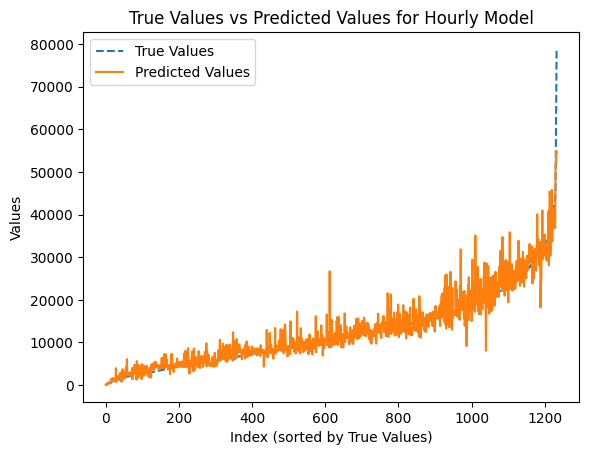

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sort the data based on y_test_hourly
sorted_indices = np.argsort(y_test_hourly)
y_test_hourly_sorted = y_test_hourly.iloc[sorted_indices]
y_pred_hourly_sorted = y_pred_hourly[sorted_indices]

# Create a line chart comparing y_test_hourly and y_pred_hourly
# plt.figure(figsize=(20, 10))

plt.plot(y_test_hourly_sorted.values, label='True Values', linestyle='--')
plt.plot(y_pred_hourly_sorted, label='Predicted Values', linestyle='-')

plt.xlabel('Index (sorted by True Values)')
plt.ylabel('Values')
plt.title('True Values vs Predicted Values for Hourly Model')
plt.legend()
# Create a figure with a larger size
plt.show()


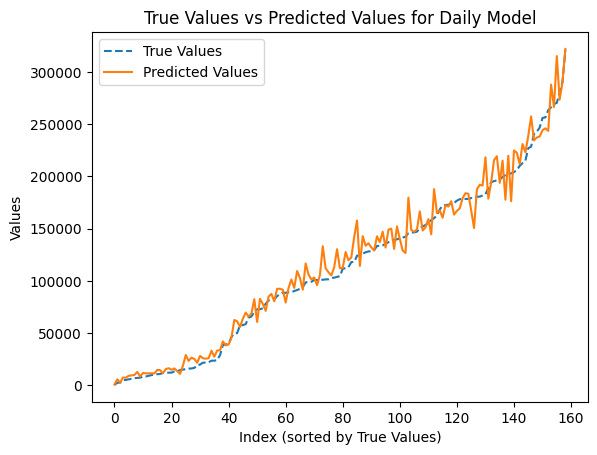

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sort the data based on y_test_daily
sorted_indices = np.argsort(y_test_daily)
y_test_daily_sorted = y_test_daily.iloc[sorted_indices]
y_pred_daily_sorted = y_pred_daily[sorted_indices]

# Create a line chart comparing y_test_daily and y_pred_daily
# plt.figure(figsize=(20, 10))

plt.plot(y_test_daily_sorted.values, label='True Values', linestyle='--')
plt.plot(y_pred_daily_sorted, label='Predicted Values', linestyle='-')

plt.xlabel('Index (sorted by True Values)')
plt.ylabel('Values')
plt.title('True Values vs Predicted Values for Daily Model')
plt.legend()
# Create a figure with a larger size
plt.show()


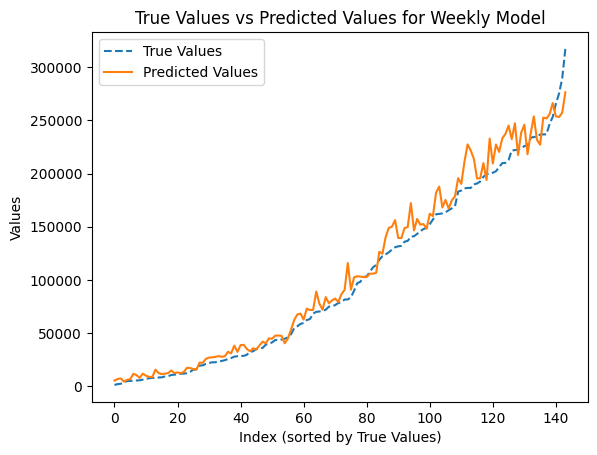

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sort the data based on y_test_weekly
sorted_indices = np.argsort(y_test_weekly)
y_test_weekly_sorted = y_test_weekly.iloc[sorted_indices]
y_pred_weekly_sorted = y_pred_weekly[sorted_indices]

# Create a line chart comparing y_test_weekly and y_pred_weekly
# plt.figure(figsize=(20, 10))

plt.plot(y_test_weekly_sorted.values, label='True Values', linestyle='--')
plt.plot(y_pred_weekly_sorted, label='Predicted Values', linestyle='-')

plt.xlabel('Index (sorted by True Values)')
plt.ylabel('Values')
plt.title('True Values vs Predicted Values for Weekly Model')
plt.legend()
# Create a figure with a larger size
plt.show()
